In [1]:
# Imports and path definitions

import sys
import os
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import combinations

path = os.getcwd() + '/'

# NEW APPROACH

#### Pre analysis step!

-- hiperfino = 0 
-- Chequear el buen control sobre niveles

#### First trials:
~ Parallel and isotrope hyperfine
Polinomios de intervalos  5/3 puntos de H


# Flow
1. Run your simpre calculation and plot your results.
2. Define a trainning data set region without non-avoided crossings
    - Minimum of 3-5 points (plot your results)
3. Run Poly.py 
4. Run expected_values.py
5. Run main.py

n. of points: 503


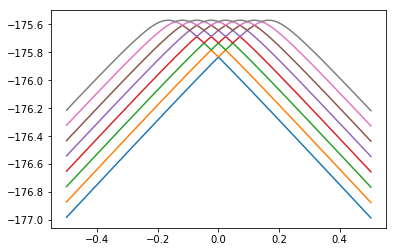

In [2]:
ene_f = path + "simpre.ene"

ene = np.loadtxt(ene_f, dtype= float)

plt.plot(ene[:,0], ene[:,[1,2,3,4,5,6,7,8]])
#plt.plot(ene[:,0], ene[:,[17, 18,19,20, 21, 22, 23, 24,25,26]])#, 9,10, 11, 12, 13, 14, 15, 16]])
#plt.plot(ene[:,0], ene[:,1:])
#plt.savefig('plot_ene.png', dpi = 300)

print 'n. of points: ' + str(len(ene))
plt.show()


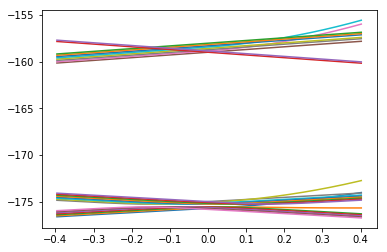

                lvl_1        lvl_2        lvl_3        lvl_4        lvl_5  \
-0.40101          NaN          NaN          NaN          NaN          NaN   
-0.40001          NaN          NaN          NaN          NaN          NaN   
-0.39901          NaN          NaN          NaN          NaN          NaN   
-0.39801          NaN          NaN          NaN          NaN          NaN   
-0.39701          NaN          NaN          NaN          NaN          NaN   
-0.39601  -176.737160  -176.627224  -176.517451  -176.407896  -176.298639   
-0.39501  -176.734842  -176.624909  -176.515140  -176.405590  -176.296341   
-0.39401  -176.732525  -176.622595  -176.512830  -176.403285  -176.294044   
-0.39301  -176.730207  -176.620280  -176.510519  -176.400980  -176.291746   
-0.39201  -176.727890  -176.617966  -176.508209  -176.398676  -176.289449   
-0.39101  -176.725573  -176.615652  -176.505899  -176.396371  -176.287152   
-0.39001  -176.723256  -176.613338  -176.503589  -176.394066  -176.284855   

In [14]:
# Evaluate expected values

plt.plot(expected_df.index, expected_df.iloc[:,1:])
#plt.plot(expected_df.index, expected_df.iloc[:,[8,9,10,]])
#plt.plot(expected_df.index, expected_df.iloc[:,[16,17, 18,19,20,21,22,23,24,25]])
#plt.savefig('plot_prev.png', dpi = 300)

#print 'n. of points: ' + str(len(ene_prev))
plt.show()
print expected_df

In [15]:
print ene_df

            lvl_1    lvl_2    lvl_3    lvl_4    lvl_5    lvl_6    lvl_7  \
-0.40101 -176.749 -176.639 -176.529 -176.419  -176.31 -176.201 -176.093   
-0.40001 -176.746 -176.636 -176.527 -176.417 -176.308 -176.199 -176.091   
-0.39901 -176.744 -176.634 -176.524 -176.415 -176.306 -176.197 -176.088   
-0.39801 -176.742 -176.632 -176.522 -176.413 -176.303 -176.194 -176.086   
-0.39701        u        u        u        u        u        u        u   
-0.39601        u        u        u        u        u        u        u   
-0.39501        u        u        u        u        u        u        u   
-0.39401        u        u        u        u        u        u        u   
-0.39301        u        u        u        u        u        u        u   
-0.39201        u        u        u        u        u        u        u   
-0.39101        u        u        u        u        u        u        u   
-0.39001        u        u        u        u        u        u        u   
-0.38901        u        

In [3]:
#
## Functions module
#

def poly(five_H, five_E): #dataset with set of points: would retrieve 
    #print five_E
    #print five_H
    x = five_H # set campos H (5)
    y = five_E # set valores E (5)
        
    vec_z = np.polyfit(x, y, deg = 2)
    return vec_z
    
    #poli_out = open(path + 'poli.out', 'w')
    #poli_out.write('name\tk0\tk1\tk2\n')
    #poli_out.write(i + '\t' + str(k0) + '\t' + str(k1) + '\t' + str(k2))
    #poli_out.write('\n')
    #poli_out.close()


def expected_E(vec_z, H_v):
    k0 = vec_z[2]
    k1 = vec_z[1]
    k2 = vec_z[0]
    predicted_E = (k2 * (float(H_v)**2)) + (k1 * float(H_v)) + k0
    return predicted_E
    #expec_out.write(str(v) + '\t')


def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [4]:
#
## Initial definitions
#

# Defined by the user so far; automatize for the future
J = float(8)
I = float(7.5)
g_par = 0.0000
g_per = 0.0000

# Lists
tot_lvls = int((2*J + 1)*(2*I + 1))
m_j = list(range(int(-(2*J)), int((2*J+2)), int(2)))
m_i = list(range(int(-(2*I)), int((2*I+2)), int(2)))

lvls_list = []
for i in list(range(np.size(ene, axis=1)-1)):
    lvls_list.append('lvl_'+ str(i+1))

## Generate projections list from m_j and m_i
projections_l = []
for j in m_j:
    for i in m_i:
        proj = str(j) + '/' + str(i)
        projections_l.append(proj)

#print projections_l
#print lvls_list
#print tot_lvls


In [5]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')

            
#print order_df.iloc[6,1]
#print ene_df.iloc[6,1]
#print expected_df.iloc[:,1]


In [12]:
print ene_df

            lvl_1       lvl_2       lvl_3       lvl_4       lvl_5       lvl_6  \
-0.40101 -176.749 -176.638797 -176.529005 -176.419423 -176.310130 -176.201246   
-0.40001 -176.746 -176.636482 -176.526694 -176.417118 -176.307832 -176.198958   
-0.39901 -176.744 -176.634168 -176.524383 -176.414812 -176.305533 -176.196670   
-0.39801 -176.742 -176.631853 -176.522072 -176.412506 -176.303235 -176.194382   
-0.39701        u -176.629538 -176.519761 -176.410201 -176.300937 -176.192095   
-0.39601        u -176.627224 -176.517451 -176.407895 -176.298639 -176.189807   
-0.39501        u -176.624909 -176.515140 -176.405590 -176.296341 -176.187520   
-0.39401 -176.733 -176.622595 -176.512830 -176.403285 -176.294043 -176.185234   
-0.39301        u -176.620280 -176.510519 -176.400980 -176.291746 -176.182947   
-0.39201        u -176.617966 -176.508209 -176.398675 -176.289449 -176.180661   
-0.39101        u -176.615652 -176.505899 -176.396371 -176.287152 -176.178375   
-0.39001 -176.723 -176.61333

In [16]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


test_list = []

# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')


            
            
# Open out files
expec_out = open('expected_values.out', 'w')
poli_out = open('poli.out', 'w')

#
##
### Main loop
##
#

#print order_df

n = 0
col = 0
row = 0
for i0 in lvls_list:

    c0 = 0
    c1=0
    
    n+= 1
    
    five_H = []
    five_E = []
    d_poli = {}
    
    poli_out.write(i0 + '\n' )
    
    
    for i1 in H_values:
        print i1
        c0 += 1
        c1 += 1     
        
        # Rellenar listas
        five_H.append(i1)
        
        pos = float(order_df.loc[i1, i0])
        #col = int(pos)-1
        #row = int(c1)-1
        #five_E.append(ene_df.iloc[row, col])
        
        
        if math.isnan(pos):
            print 'isnull'
            five_E.append(v0)
            print five_E
        
        else:
            
            col = int(pos)-1
            row = int(c1)-1
            print col
            print row
            five_E.append(ene_df.iloc[row, col])
        
        
        # Everything starts now......
        if len(five_H) ==5:
            
            # Fitting
            vec_poly = poly(five_H, five_E)
            p = np.poly1d(vec_poly)
            d_poli[i1] = p
            poli_out.write('H: ' + str(H_values[c1-1]) + ' ' + str(p) +'\n') #+ ' ' + five_H + ' ' + five_E + '\n')
            
            
            if c1 == len(H_values):
                continue
            
            else:
                
                H_next = float(H_values[c1])
                
                # Calculates expected_v for the next H value
                v0 = float(expected_E(vec_poly, H_next))
                v1 = round(v0,6)
                v2 = round(v0,5)
                v3 = round(v0,4)
                v4 = round(v0,3)
                v1 = truncate(v1, 6)
                v2 = truncate(v2, 5)
                v3 = truncate(v3, 4)
                v4 = truncate(v4, 3)
                #v5 = truncate(v5, 2)

                expected_df.loc[H_next, i0] = v1


                # Search expected values in ene_df
                e0 = float(ene_df.loc[H_next, i0])
                e1 = round(e0,6)
                e2 = round(e0,5)
                e3 = round(e0,4)
                e4 = round(e0,3)
                e1 = truncate(e1, 6)
                e2 = truncate(e2, 5)
                e3 = truncate(e3, 4)
                e4 = truncate(e4, 3)
                
                print 'aqui v0: ' + str(v0)
                print 'aqui e0: ' + str(e0)
                print 'aqui v1: ' + str(v1)
                print 'aqui e1: ' + str(e1)
                print 'aqui v2: ' + str(v2)
                print 'aqui e2: ' + str(e2)
                print 'aqui v3: ' + str(v3)
                print 'aqui e3: ' + str(e3)
                print 'aqui v4: ' + str(v4)
                print 'aqui e4: ' + str(e4)

                if v1 == e1:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    ene_df.loc[i1, i0] = 'u'
                    print 'valor exacto'
                    

                else:
                    if v2 == e2:
                        order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                        ene_df.loc[i1, i0] = 'u'
                        print 'valor exacto-2'
                
                    else:
                        if v3 == e3:
                            order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                            ene_df.loc[i1, i0] = 'u'
                            print 'valor exacto-3'
                
                        else:
                            #if v4 == e4:
                            #    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                            #    print 'valor exacto-4'

                            #else: ### time to re-order!!
                            #    print 'no match'

                            print v1
                            print e1
                            print ene_df.loc[H_next]

                            c4 = 0

                            for i3 in lvls_list:
                                c4 += 1

                                if ene_df.loc[H_next, i3] == 'u':
                                    continue
                                    
                                else:
                                    
                                    e0_2 = float(ene_df.loc[H_next, i3])
                                    e1_2 = round(e0_2,6)
                                    e2_2 = round(e0_2,5)
                                    e3_2 = round(e0_2,4)
                                    e4_2 = round(e0_2,3)
                                    e1_2 = truncate(e1_2, 6)
                                    e2_2 = truncate(e2_2, 5)
                                    e3_2 = truncate(e3_2, 4)
                                    e4_2 = truncate(e4_2, 3)



                                    if v1 == e1_2:
                                        order_df.loc[H_next, i0] = c4
                                        print 'yes 1'


                                    else:
                                        if v2 == e2_2:
                                            order_df.loc[H_next, i0] = c4
                                            print c4
                                            print 'yes 2'


                                        else:
                                            if v3 == e3_2:
                                                order_df.loc[H_next, i0] = c4
                                                print c4
                                                print 'yes 3'


                                            #else:
                                            #    if v4 == e4_2:
                                            #        order_df.loc[H_next, i0] = c4
                                            #        print c4
                                            #        print 'yes 5'

                                                #else:
                                                #    if v4 in l_e4_2:
                                                #        order_df.loc[H_next, i0] = c4


                c0 = c0-1
                five_E.pop(0)
                five_H.pop(0)
    
    poli_out.write('\n')
#print expected_df

order_df.to_csv(path + 'order.txt', header = lvls_list, sep=' ', na_rep='na')
expected_df.to_csv(path + 'expected.txt', header = lvls_list, sep=' ', na_rep='na')
    
## Condition 1 : compare pends (k1)
   
## Condition 2 : compare second derivative (k2)
    
## Condition 3 : allowed/non-allowed transitions (+/- 1) 
expec_out.close()
poli_out.close()

-0.40101
0
0
-0.40001
0
1
-0.39901
0
2
-0.39801
0
3
-0.39701
0
4
aqui v0: -176.73715994
aqui e0: -176.7371599
aqui v1: -176.737160
aqui e1: -176.737160
aqui v2: -176.73716
aqui e2: -176.73716
aqui v3: -176.7372
aqui e3: -176.7372
aqui v4: -176.737
aqui e4: -176.737
valor exacto
-0.39601
0
5
aqui v0: -176.73484236
aqui e0: -176.7348424
aqui v1: -176.734842
aqui e1: -176.734842
aqui v2: -176.73484
aqui e2: -176.73484
aqui v3: -176.7348
aqui e3: -176.7348
aqui v4: -176.735
aqui e4: -176.735
valor exacto
-0.39501
0
6
aqui v0: -176.73252494
aqui e0: -176.7325249
aqui v1: -176.732525
aqui e1: -176.732525
aqui v2: -176.73252
aqui e2: -176.73252
aqui v3: -176.7325
aqui e3: -176.7325
aqui v4: -176.733
aqui e4: -176.733
valor exacto
-0.39401
0
7
aqui v0: -176.73020746
aqui e0: -176.7302075
aqui v1: -176.730207
aqui e1: -176.730208
aqui v2: -176.73021
aqui e2: -176.73021
aqui v3: -176.7302
aqui e3: -176.7302
aqui v4: -176.730
aqui e4: -176.730
valor exacto-2
-0.39301
0
8
aqui v0: -176.72789014
aq

valor exacto
-0.35301
0
48
aqui v0: -176.63524652
aqui e0: -176.6352464
aqui v1: -176.635247
aqui e1: -176.635246
aqui v2: -176.63525
aqui e2: -176.63525
aqui v3: -176.6352
aqui e3: -176.6352
aqui v4: -176.635
aqui e4: -176.635
valor exacto-2
-0.35201
0
49
aqui v0: -176.63293156
aqui e0: -176.6329317
aqui v1: -176.632932
aqui e1: -176.632932
aqui v2: -176.63293
aqui e2: -176.63293
aqui v3: -176.6329
aqui e3: -176.6329
aqui v4: -176.633
aqui e4: -176.633
valor exacto
-0.35101
0
50
aqui v0: -176.63061696
aqui e0: -176.630617
aqui v1: -176.630617
aqui e1: -176.630617
aqui v2: -176.63062
aqui e2: -176.63062
aqui v3: -176.6306
aqui e3: -176.6306
aqui v4: -176.631
aqui e4: -176.631
valor exacto
-0.35001
0
51
aqui v0: -176.62830242
aqui e0: -176.6283024
aqui v1: -176.628302
aqui e1: -176.628302
aqui v2: -176.62830
aqui e2: -176.62830
aqui v3: -176.6283
aqui e3: -176.6283
aqui v4: -176.628
aqui e4: -176.628
valor exacto
-0.34901
0
52
aqui v0: -176.6259879
aqui e0: -176.6259879
aqui v1: -176.62

aqui v0: -176.5496513
aqui e0: -176.5496513
aqui v1: -176.549651
aqui e1: -176.549651
aqui v2: -176.54965
aqui e2: -176.54965
aqui v3: -176.5497
aqui e3: -176.5497
aqui v4: -176.550
aqui e4: -176.550
valor exacto
-0.31501
0
86
aqui v0: -176.5473395
aqui e0: -176.5473395
aqui v1: -176.547339
aqui e1: -176.547339
aqui v2: -176.54734
aqui e2: -176.54734
aqui v3: -176.5473
aqui e3: -176.5473
aqui v4: -176.547
aqui e4: -176.547
valor exacto
-0.31401
0
87
aqui v0: -176.5450278
aqui e0: -176.5450278
aqui v1: -176.545028
aqui e1: -176.545028
aqui v2: -176.54503
aqui e2: -176.54503
aqui v3: -176.5450
aqui e3: -176.5450
aqui v4: -176.545
aqui e4: -176.545
valor exacto
-0.31301
0
88
aqui v0: -176.5427162
aqui e0: -176.5427161
aqui v1: -176.542716
aqui e1: -176.542716
aqui v2: -176.54272
aqui e2: -176.54272
aqui v3: -176.5427
aqui e3: -176.5427
aqui v4: -176.543
aqui e4: -176.543
valor exacto
-0.31201
0
89
aqui v0: -176.54040452
aqui e0: -176.5404045
aqui v1: -176.540405
aqui e1: -176.540404
aqui 

valor exacto
-0.26101
0
140
aqui v0: -176.4226476
aqui e0: -176.4226477
aqui v1: -176.422648
aqui e1: -176.422648
aqui v2: -176.42265
aqui e2: -176.42265
aqui v3: -176.4226
aqui e3: -176.4226
aqui v4: -176.423
aqui e4: -176.423
valor exacto
-0.26001
0
141
aqui v0: -176.42034174
aqui e0: -176.4203416
aqui v1: -176.420342
aqui e1: -176.420342
aqui v2: -176.42034
aqui e2: -176.42034
aqui v3: -176.4203
aqui e3: -176.4203
aqui v4: -176.420
aqui e4: -176.420
valor exacto
-0.25901
0
142
aqui v0: -176.41803568
aqui e0: -176.4180357
aqui v1: -176.418036
aqui e1: -176.418036
aqui v2: -176.41804
aqui e2: -176.41804
aqui v3: -176.4180
aqui e3: -176.4180
aqui v4: -176.418
aqui e4: -176.418
valor exacto
-0.25801
0
143
aqui v0: -176.41572988
aqui e0: -176.41573
aqui v1: -176.415730
aqui e1: -176.415730
aqui v2: -176.41573
aqui e2: -176.41573
aqui v3: -176.4157
aqui e3: -176.4157
aqui v4: -176.416
aqui e4: -176.416
valor exacto
-0.25701
0
144
aqui v0: -176.41342438
aqui e0: -176.4134243
aqui v1: -176.

valor exacto
-0.21601
0
185
aqui v0: -176.3190147
aqui e0: -176.3190147
aqui v1: -176.319015
aqui e1: -176.319015
aqui v2: -176.31901
aqui e2: -176.31901
aqui v3: -176.3190
aqui e3: -176.3190
aqui v4: -176.319
aqui e4: -176.319
valor exacto
-0.21501
0
186
aqui v0: -176.31671534
aqui e0: -176.3167153
aqui v1: -176.316715
aqui e1: -176.316715
aqui v2: -176.31672
aqui e2: -176.31672
aqui v3: -176.3167
aqui e3: -176.3167
aqui v4: -176.317
aqui e4: -176.317
valor exacto
-0.21401
0
187
aqui v0: -176.31441612
aqui e0: -176.3144161
aqui v1: -176.314416
aqui e1: -176.314416
aqui v2: -176.31442
aqui e2: -176.31442
aqui v3: -176.3144
aqui e3: -176.3144
aqui v4: -176.314
aqui e4: -176.314
valor exacto
-0.21301
0
188
aqui v0: -176.31211704
aqui e0: -176.3121171
aqui v1: -176.312117
aqui e1: -176.312117
aqui v2: -176.31212
aqui e2: -176.31212
aqui v3: -176.3121
aqui e3: -176.3121
aqui v4: -176.312
aqui e4: -176.312
valor exacto
-0.21201
0
189
aqui v0: -176.30981824
aqui e0: -176.3098182
aqui v1: -17

aqui v0: -176.22489988
aqui e0: -176.2249
aqui v1: -176.224900
aqui e1: -176.224900
aqui v2: -176.22490
aqui e2: -176.22490
aqui v3: -176.2249
aqui e3: -176.2249
aqui v4: -176.225
aqui e4: -176.225
valor exacto
-0.17401
0
227
aqui v0: -176.22260914
aqui e0: -176.222609
aqui v1: -176.222609
aqui e1: -176.222609
aqui v2: -176.22261
aqui e2: -176.22261
aqui v3: -176.2226
aqui e3: -176.2226
aqui v4: -176.223
aqui e4: -176.223
valor exacto
-0.17301
0
228
aqui v0: -176.22031834
aqui e0: -176.2203184
aqui v1: -176.220318
aqui e1: -176.220318
aqui v2: -176.22032
aqui e2: -176.22032
aqui v3: -176.2203
aqui e3: -176.2203
aqui v4: -176.220
aqui e4: -176.220
valor exacto
-0.17201
0
229
aqui v0: -176.21802796
aqui e0: -176.2180279
aqui v1: -176.218028
aqui e1: -176.218028
aqui v2: -176.21803
aqui e2: -176.21803
aqui v3: -176.2180
aqui e3: -176.2180
aqui v4: -176.218
aqui e4: -176.218
valor exacto
-0.17101
0
230
aqui v0: -176.21573768
aqui e0: -176.2157377
aqui v1: -176.215738
aqui e1: -176.215738
a

aqui v0: -176.1084238
aqui e0: -176.1084237
aqui v1: -176.108424
aqui e1: -176.108424
aqui v2: -176.10842
aqui e2: -176.10842
aqui v3: -176.1084
aqui e3: -176.1084
aqui v4: -176.108
aqui e4: -176.108
valor exacto
-0.12301
0
278
aqui v0: -176.10614836
aqui e0: -176.1061485
aqui v1: -176.106148
aqui e1: -176.106148
aqui v2: -176.10615
aqui e2: -176.10615
aqui v3: -176.1061
aqui e3: -176.1061
aqui v4: -176.106
aqui e4: -176.106
valor exacto
-0.12201
0
279
aqui v0: -176.10387362
aqui e0: -176.1038736
aqui v1: -176.103874
aqui e1: -176.103874
aqui v2: -176.10387
aqui e2: -176.10387
aqui v3: -176.1039
aqui e3: -176.1039
aqui v4: -176.104
aqui e4: -176.104
valor exacto
-0.12101
0
280
aqui v0: -176.10159912
aqui e0: -176.1015992
aqui v1: -176.101599
aqui e1: -176.101599
aqui v2: -176.10160
aqui e2: -176.10160
aqui v3: -176.1016
aqui e3: -176.1016
aqui v4: -176.102
aqui e4: -176.102
valor exacto
-0.12001
0
281
aqui v0: -176.09932518
aqui e0: -176.0993251
aqui v1: -176.099325
aqui e1: -176.09932

aqui v0: -176.02453264
aqui e0: -176.0245326
aqui v1: -176.024533
aqui e1: -176.024533
aqui v2: -176.02453
aqui e2: -176.02453
aqui v3: -176.0245
aqui e3: -176.0245
aqui v4: -176.025
aqui e4: -176.025
valor exacto
-0.08601
0
315
aqui v0: -176.02227482
aqui e0: -176.0222748
aqui v1: -176.022275
aqui e1: -176.022275
aqui v2: -176.02227
aqui e2: -176.02227
aqui v3: -176.0223
aqui e3: -176.0223
aqui v4: -176.022
aqui e4: -176.022
valor exacto
-0.08501
0
316
aqui v0: -176.02001754
aqui e0: -176.0200176
aqui v1: -176.020018
aqui e1: -176.020018
aqui v2: -176.02002
aqui e2: -176.02002
aqui v3: -176.0200
aqui e3: -176.0200
aqui v4: -176.020
aqui e4: -176.020
valor exacto
-0.08401
0
317
aqui v0: -176.01776094
aqui e0: -176.0177609
aqui v1: -176.017761
aqui e1: -176.017761
aqui v2: -176.01776
aqui e2: -176.01776
aqui v3: -176.0178
aqui e3: -176.0178
aqui v4: -176.018
aqui e4: -176.018
valor exacto
-0.08301
0
318
aqui v0: -176.01550482
aqui e0: -176.0155048
aqui v1: -176.015505
aqui e1: -176.0155

valor exacto
-0.05101
0
350
aqui v0: -175.94366548
aqui e0: -175.9436656
aqui v1: -175.943665
aqui e1: -175.943666
aqui v2: -175.94367
aqui e2: -175.94367
aqui v3: -175.9437
aqui e3: -175.9437
aqui v4: -175.944
aqui e4: -175.944
valor exacto-2
-0.05001
0
351
aqui v0: -175.94143334
aqui e0: -175.9414333
aqui v1: -175.941433
aqui e1: -175.941433
aqui v2: -175.94143
aqui e2: -175.94143
aqui v3: -175.9414
aqui e3: -175.9414
aqui v4: -175.941
aqui e4: -175.941
valor exacto
-0.04901
0
352
aqui v0: -175.93920192
aqui e0: -175.9392019
aqui v1: -175.939202
aqui e1: -175.939202
aqui v2: -175.93920
aqui e2: -175.93920
aqui v3: -175.9392
aqui e3: -175.9392
aqui v4: -175.939
aqui e4: -175.939
valor exacto
-0.04801
0
353
aqui v0: -175.93697134
aqui e0: -175.9369714
aqui v1: -175.936971
aqui e1: -175.936971
aqui v2: -175.93697
aqui e2: -175.93697
aqui v3: -175.9370
aqui e3: -175.9370
aqui v4: -175.937
aqui e4: -175.937
valor exacto
-0.04701
0
354
aqui v0: -175.93474174
aqui e0: -175.9347419
aqui v1: 

aqui v0: -175.86395366
aqui e0: -175.8639537
aqui v1: -175.863954
aqui e1: -175.863954
aqui v2: -175.86395
aqui e2: -175.86395
aqui v3: -175.8640
aqui e3: -175.8640
aqui v4: -175.864
aqui e4: -175.864
valor exacto
-0.01401
0
387
aqui v0: -175.86176192
aqui e0: -175.861762
aqui v1: -175.861762
aqui e1: -175.861762
aqui v2: -175.86176
aqui e2: -175.86176
aqui v3: -175.8618
aqui e3: -175.8618
aqui v4: -175.862
aqui e4: -175.862
valor exacto
-0.01301
0
388
aqui v0: -175.85957168
aqui e0: -175.8595718
aqui v1: -175.859572
aqui e1: -175.859572
aqui v2: -175.85957
aqui e2: -175.85957
aqui v3: -175.8596
aqui e3: -175.8596
aqui v4: -175.860
aqui e4: -175.860
valor exacto
-0.01201
0
389
aqui v0: -175.85738298
aqui e0: -175.8573829
aqui v1: -175.857383
aqui e1: -175.857383
aqui v2: -175.85738
aqui e2: -175.85738
aqui v3: -175.8574
aqui e3: -175.8574
aqui v4: -175.857
aqui e4: -175.857
valor exacto
-0.01101
0
390
aqui v0: -175.85519554
aqui e0: -175.8551956
aqui v1: -175.855196
aqui e1: -175.85519

aqui e0: -175.8529661
aqui v1: -175.813952
aqui e1: -175.852966
aqui v2: -175.81395
aqui e2: -175.85297
aqui v3: -175.8140
aqui e3: -175.8530
aqui v4: -175.814
aqui e4: -175.853
-175.813952
-175.852966
lvl_1    -175.853
lvl_2    -175.814
lvl_3    -175.752
lvl_4    -175.715
lvl_5    -175.658
lvl_6    -175.628
lvl_7    -175.588
lvl_8    -175.574
lvl_9     -175.26
lvl_10   -175.246
lvl_11   -175.206
lvl_12   -175.175
lvl_13   -175.118
lvl_14   -175.082
lvl_15   -175.019
lvl_16    -174.98
lvl_17   -159.015
lvl_18   -158.963
lvl_19   -158.877
lvl_20   -158.824
lvl_21   -158.738
lvl_22   -158.686
lvl_23     -158.6
lvl_24   -158.547
lvl_25   -158.461
lvl_26   -158.409
Name: 0.00899, dtype: object
yes 1
0.00899
1
410
aqui v0: -175.81179992
aqui e0: -175.8551519
aqui v1: -175.811800
aqui e1: -175.855152
aqui v2: -175.81180
aqui e2: -175.85515
aqui v3: -175.8118
aqui e3: -175.8552
aqui v4: -175.812
aqui e4: -175.855
-175.811800
-175.855152
lvl_1    -175.855
lvl_2    -175.812
lvl_3    -175.754
lv

yes 1
0.01999
1
421
aqui v0: -175.78827024
aqui e0: -175.8792905
aqui v1: -175.788270
aqui e1: -175.879290
aqui v2: -175.78827
aqui e2: -175.87929
aqui v3: -175.7883
aqui e3: -175.8793
aqui v4: -175.788
aqui e4: -175.879
-175.788270
-175.879290
lvl_1    -175.879
lvl_2    -175.788
lvl_3    -175.777
lvl_4    -175.691
lvl_5    -175.681
lvl_6    -175.609
lvl_7    -175.602
lvl_8     -175.57
lvl_9    -175.263
lvl_10   -175.231
lvl_11   -175.224
lvl_12   -175.153
lvl_13   -175.142
lvl_14   -175.057
lvl_15   -175.045
lvl_16   -174.954
lvl_17    -159.05
lvl_18   -158.928
lvl_19   -158.912
lvl_20   -158.789
lvl_21   -158.773
lvl_22   -158.651
lvl_23   -158.635
lvl_24   -158.512
lvl_25   -158.496
lvl_26   -158.374
Name: 0.02099, dtype: object
yes 1
0.02099
1
422
aqui v0: -175.78614532
aqui e0: -175.881493
aqui v1: -175.786145
aqui e1: -175.881493
aqui v2: -175.78615
aqui e2: -175.88149
aqui v3: -175.7861
aqui e3: -175.8815
aqui v4: -175.786
aqui e4: -175.881
-175.786145
-175.881493
lvl_1    -175.

lvl_1    -175.906
lvl_2    -175.802
lvl_3    -175.763
lvl_4    -175.704
lvl_5    -175.668
lvl_6    -175.619
lvl_7    -175.594
lvl_8    -175.571
lvl_9    -175.262
lvl_10    -175.24
lvl_11   -175.214
lvl_12   -175.165
lvl_13   -175.129
lvl_14    -175.07
lvl_15   -175.031
lvl_16   -174.927
lvl_17   -159.085
lvl_18   -158.947
lvl_19   -158.893
lvl_20   -158.808
lvl_21   -158.754
lvl_22    -158.67
lvl_23   -158.616
lvl_24   -158.531
lvl_25   -158.477
lvl_26   -158.393
Name: 0.03299, dtype: object
yes 1
0.03299
2
434
aqui v0: -175.76085626
aqui e0: -175.9080175
aqui v1: -175.760856
aqui e1: -175.908017
aqui v2: -175.76086
aqui e2: -175.90802
aqui v3: -175.7609
aqui e3: -175.9080
aqui v4: -175.761
aqui e4: -175.908
-175.760856
-175.908017
lvl_1    -175.908
lvl_2    -175.804
lvl_3    -175.761
lvl_4    -175.706
lvl_5    -175.667
lvl_6    -175.621
lvl_7    -175.593
lvl_8    -175.572
lvl_9    -175.262
lvl_10   -175.241
lvl_11   -175.213
lvl_12   -175.167
lvl_13   -175.127
lvl_14   -175.072
lvl_15

0.04799
3
449
aqui v0: -175.7298939
aqui e0: -175.9413887
aqui v1: -175.729894
aqui e1: -175.941389
aqui v2: -175.72989
aqui e2: -175.94139
aqui v3: -175.7299
aqui e3: -175.9414
aqui v4: -175.730
aqui e4: -175.941
-175.729894
-175.941389
lvl_1    -175.941
lvl_2    -175.837
lvl_3    -175.736
lvl_4     -175.73
lvl_5    -175.645
lvl_6     -175.64
lvl_7    -175.581
lvl_8    -175.578
lvl_9    -175.255
lvl_10   -175.253
lvl_11   -175.193
lvl_12   -175.188
lvl_13   -175.103
lvl_14   -175.097
lvl_15   -174.997
lvl_16   -174.892
lvl_17   -159.132
lvl_18   -158.993
lvl_19   -158.855
lvl_20   -158.846
lvl_21   -158.716
lvl_22   -158.708
lvl_23   -158.578
lvl_24   -158.569
lvl_25    -158.44
lvl_26   -158.431
Name: 0.04899, dtype: object
yes 1
0.04899
3
450
aqui v0: -175.72786014
aqui e0: -175.9436209
aqui v1: -175.727860
aqui e1: -175.943621
aqui v2: -175.72786
aqui e2: -175.94362
aqui v3: -175.7279
aqui e3: -175.9436
aqui v4: -175.728
aqui e4: -175.944
-175.727860
-175.943621
lvl_1    -175.944
lv

yes 1
0.06399
3
465
aqui v0: -175.69791264
aqui e0: -175.9772034
aqui v1: -175.697913
aqui e1: -175.977203
aqui v2: -175.69791
aqui e2: -175.97720
aqui v3: -175.6979
aqui e3: -175.9772
aqui v4: -175.698
aqui e4: -175.977
-175.697913
-175.977203
lvl_1    -175.977
lvl_2    -175.872
lvl_3    -175.769
lvl_4    -175.698
lvl_5    -175.674
lvl_6    -175.614
lvl_7    -175.597
lvl_8     -175.57
lvl_9    -175.263
lvl_10   -175.236
lvl_11   -175.219
lvl_12   -175.159
lvl_13   -175.135
lvl_14   -175.064
lvl_15   -174.962
lvl_16   -174.856
lvl_17   -159.178
lvl_18    -159.04
lvl_19   -158.902
lvl_20   -158.799
lvl_21   -158.763
lvl_22   -158.661
lvl_23   -158.625
lvl_24   -158.522
lvl_25   -158.486
lvl_26   -158.384
Name: 0.06499, dtype: object
yes 1
0.06499
3
466
aqui v0: -175.69595782
aqui e0: -175.9794484
aqui v1: -175.695958
aqui e1: -175.979448
aqui v2: -175.69596
aqui e2: -175.97945
aqui v3: -175.6960
aqui e3: -175.9794
aqui v4: -175.696
aqui e4: -175.979
-175.695958
-175.979448
lvl_1    -175

lvl_1     -176.02
lvl_2    -175.914
lvl_3     -175.81
lvl_4    -175.711
lvl_5    -175.662
lvl_6    -175.624
lvl_7     -175.59
lvl_8    -175.573
lvl_9    -175.261
lvl_10   -175.244
lvl_11   -175.209
lvl_12   -175.171
lvl_13   -175.122
lvl_14   -175.024
lvl_15    -174.92
lvl_16   -174.813
lvl_17   -159.234
lvl_18   -159.095
lvl_19   -158.957
lvl_20   -158.818
lvl_21   -158.744
lvl_22    -158.68
lvl_23   -158.605
lvl_24   -158.542
lvl_25   -158.467
lvl_26   -158.403
Name: 0.08399, dtype: object
yes 1
0.08399
4
485
aqui v0: -175.6600878
aqui e0: -176.0222296
aqui v1: -175.660088
aqui e1: -176.022230
aqui v2: -175.66009
aqui e2: -176.02223
aqui v3: -175.6601
aqui e3: -176.0222
aqui v4: -175.660
aqui e4: -176.022
-175.660088
-176.022230
lvl_1    -176.022
lvl_2    -175.916
lvl_3    -175.812
lvl_4    -175.713
lvl_5     -175.66
lvl_6    -175.626
lvl_7    -175.589
lvl_8    -175.573
lvl_9     -175.26
lvl_10   -175.245
lvl_11   -175.207
lvl_12   -175.173
lvl_13    -175.12
lvl_14   -175.021
lvl_15 

lvl_1    -176.063
lvl_2    -175.956
lvl_3    -175.851
lvl_4     -175.75
lvl_5    -175.657
lvl_6    -175.629
lvl_7    -175.587
lvl_8    -175.574
lvl_9    -175.259
lvl_10   -175.247
lvl_11   -175.204
lvl_12   -175.177
lvl_13   -175.084
lvl_14   -174.982
lvl_15   -174.877
lvl_16    -174.77
lvl_17   -159.289
lvl_18   -159.151
lvl_19   -159.012
lvl_20   -158.874
lvl_21   -158.735
lvl_22   -158.688
lvl_23   -158.597
lvl_24    -158.55
lvl_25   -158.459
lvl_26   -158.412
Name: 0.10299, dtype: object
6
yes 2
0.10299
5
504
aqui v0: -175.62746194
aqui e0: -176.0652192
aqui v1: -175.627462
aqui e1: -176.065219
aqui v2: -175.62746
aqui e2: -176.06522
aqui v3: -175.6275
aqui e3: -176.0652
aqui v4: -175.627
aqui e4: -176.065
-175.627462
-176.065219
lvl_1    -176.065
lvl_2    -175.958
lvl_3    -175.853
lvl_4    -175.752
lvl_5    -175.658
lvl_6    -175.627
lvl_7    -175.588
lvl_8    -175.573
lvl_9     -175.26
lvl_10   -175.246
lvl_11   -175.206
lvl_12   -175.175
lvl_13   -175.082
lvl_14    -174.98
lvl_

aqui v0: -175.59855
aqui e0: -176.1106538
aqui v1: -175.598550
aqui e1: -176.110654
aqui v2: -175.59855
aqui e2: -176.11065
aqui v3: -175.5986
aqui e3: -176.1107
aqui v4: -175.599
aqui e4: -176.111
-175.598550
-176.110654
lvl_1    -176.111
lvl_2    -176.003
lvl_3    -175.897
lvl_4    -175.794
lvl_5    -175.696
lvl_6    -175.613
lvl_7    -175.599
lvl_8     -175.57
lvl_9    -175.263
lvl_10   -175.235
lvl_11    -175.22
lvl_12   -175.137
lvl_13    -175.04
lvl_14   -174.936
lvl_15    -174.83
lvl_16   -174.723
lvl_17    -159.35
lvl_18   -159.212
lvl_19   -159.074
lvl_20   -158.935
lvl_21   -158.797
lvl_22   -158.658
lvl_23   -158.627
lvl_24    -158.52
lvl_25   -158.489
lvl_26   -158.381
Name: 0.12399, dtype: object
7
yes 2
0.12399
6
525
aqui v0: -175.59729946
aqui e0: -176.1129298
aqui v1: -175.597299
aqui e1: -176.112930
aqui v2: -175.59730
aqui e2: -176.11293
aqui v3: -175.5973
aqui e3: -176.1129
aqui v4: -175.597
aqui e4: -176.113
-175.597299
-176.112930
lvl_1    -176.113
lvl_2    -176.00

aqui v3: -175.5851
aqui e3: -176.1380
aqui v4: -175.585
aqui e4: -176.138
-175.585071
-176.137990
lvl_1    -176.138
lvl_2     -176.03
lvl_3    -175.924
lvl_4     -175.82
lvl_5     -175.72
lvl_6    -175.632
lvl_7    -175.585
lvl_8    -175.575
lvl_9    -175.258
lvl_10   -175.248
lvl_11   -175.202
lvl_12   -175.113
lvl_13   -175.014
lvl_14    -174.91
lvl_15   -174.803
lvl_16   -174.695
lvl_17   -159.385
lvl_18   -159.247
lvl_19   -159.109
lvl_20    -158.97
lvl_21   -158.832
lvl_22   -158.693
lvl_23   -158.592
lvl_24   -158.555
lvl_25   -158.454
lvl_26   -158.416
Name: 0.13599, dtype: object
7
yes 2
0.13599
6
537
aqui v0: -175.58411042
aqui e0: -176.1402703
aqui v1: -175.584110
aqui e1: -176.140270
aqui v2: -175.58411
aqui e2: -176.14027
aqui v3: -175.5841
aqui e3: -176.1403
aqui v4: -175.584
aqui e4: -176.140
-175.584110
-176.140270
lvl_1     -176.14
lvl_2    -176.032
lvl_3    -175.926
lvl_4    -175.822
lvl_5    -175.722
lvl_6    -175.633
lvl_7    -175.584
lvl_8    -175.576
lvl_9    -175.

8
yes 2
0.14999
7
551
aqui v0: -175.57371112
aqui e0: -176.1722286
aqui v1: -175.573711
aqui e1: -176.172229
aqui v2: -175.57371
aqui e2: -176.17223
aqui v3: -175.5737
aqui e3: -176.1722
aqui v4: -175.574
aqui e4: -176.172
-175.573711
-176.172229
lvl_1    -176.172
lvl_2    -176.064
lvl_3    -175.957
lvl_4    -175.852
lvl_5    -175.751
lvl_6    -175.658
lvl_7    -175.587
lvl_8    -175.574
lvl_9     -175.26
lvl_10   -175.246
lvl_11   -175.176
lvl_12   -175.083
lvl_13   -174.981
lvl_14   -174.876
lvl_15   -174.769
lvl_16   -174.661
lvl_17   -159.429
lvl_18   -159.291
lvl_19   -159.152
lvl_20   -159.014
lvl_21   -158.875
lvl_22   -158.737
lvl_23   -158.599
lvl_24   -158.548
lvl_25    -158.46
lvl_26    -158.41
Name: 0.15099, dtype: object
8
yes 2
0.15099
7
552
aqui v0: -175.57320286
aqui e0: -176.1745136
aqui v1: -175.573203
aqui e1: -176.174514
aqui v2: -175.57320
aqui e2: -176.17451
aqui v3: -175.5732
aqui e3: -176.1745
aqui v4: -175.573
aqui e4: -176.175
-175.573203
-176.174514
lvl_1    

yes 1
0.16999
7
571
aqui v0: -175.57010696
aqui e0: -176.2179821
aqui v1: -175.570107
aqui e1: -176.217982
aqui v2: -175.57011
aqui e2: -176.21798
aqui v3: -175.5701
aqui e3: -176.2180
aqui v4: -175.570
aqui e4: -176.218
-175.570107
-176.217982
lvl_1    -176.218
lvl_2     -176.11
lvl_3    -176.002
lvl_4    -175.896
lvl_5    -175.793
lvl_6    -175.695
lvl_7    -175.612
lvl_8     -175.57
lvl_9    -175.263
lvl_10   -175.221
lvl_11   -175.138
lvl_12   -175.041
lvl_13   -174.937
lvl_14   -174.831
lvl_15   -174.724
lvl_16   -174.615
lvl_17   -159.488
lvl_18   -159.349
lvl_19   -159.211
lvl_20   -159.072
lvl_21   -158.934
lvl_22   -158.795
lvl_23   -158.657
lvl_24   -158.518
lvl_25    -158.49
lvl_26   -158.352
Name: 0.17099, dtype: object
yes 1
0.17099
7
572
aqui v0: -175.57029696
aqui e0: -176.2202725
aqui v1: -175.570297
aqui e1: -176.220272
aqui v2: -175.57030
aqui e2: -176.22027
aqui v3: -175.5703
aqui e3: -176.2203
aqui v4: -175.570
aqui e4: -176.220
-175.570297
-176.220272
lvl_1     -17

0.18899
7
590
aqui v0: -175.57949872
aqui e0: -176.2615404
aqui v1: -175.579499
aqui e1: -176.261540
aqui v2: -175.57950
aqui e2: -176.26154
aqui v3: -175.5795
aqui e3: -176.2615
aqui v4: -175.579
aqui e4: -176.262
-175.579499
-176.261540
lvl_1    -176.262
lvl_2    -176.153
lvl_3    -176.045
lvl_4    -175.938
lvl_5    -175.834
lvl_6    -175.733
lvl_7    -175.643
lvl_8    -175.579
lvl_9    -175.254
lvl_10   -175.191
lvl_11     -175.1
lvl_12       -175
lvl_13   -174.895
lvl_14   -174.788
lvl_15    -174.68
lvl_16   -174.572
lvl_17   -159.543
lvl_18   -159.405
lvl_19   -159.266
lvl_20   -159.128
lvl_21   -158.989
lvl_22   -158.851
lvl_23   -158.712
lvl_24   -158.574
lvl_25   -158.435
lvl_26   -158.296
Name: 0.18999, dtype: object
8
yes 2
0.18999
7
591
aqui v0: -175.58031112
aqui e0: -176.2638351
aqui v1: -175.580311
aqui e1: -176.263835
aqui v2: -175.58031
aqui e2: -176.26384
aqui v3: -175.5803
aqui e3: -176.2638
aqui v4: -175.580
aqui e4: -176.264
-175.580311
-176.263835
lvl_1    -176.264

8
yes 2
0.20899
7
610
aqui v0: -175.60074956
aqui e0: -176.3074736
aqui v1: -175.600750
aqui e1: -176.307474
aqui v2: -175.60075
aqui e2: -176.30747
aqui v3: -175.6007
aqui e3: -176.3075
aqui v4: -175.601
aqui e4: -176.307
-175.600750
-176.307474
lvl_1    -176.307
lvl_2    -176.199
lvl_3     -176.09
lvl_4    -175.983
lvl_5    -175.877
lvl_6    -175.775
lvl_7    -175.679
lvl_8    -175.601
lvl_9    -175.233
lvl_10   -175.154
lvl_11   -175.058
lvl_12   -174.956
lvl_13    -174.85
lvl_14   -174.743
lvl_15   -174.635
lvl_16   -174.526
lvl_17   -159.601
lvl_18   -159.463
lvl_19   -159.324
lvl_20   -159.186
lvl_21   -159.048
lvl_22   -158.909
lvl_23   -158.771
lvl_24   -158.632
lvl_25   -158.376
lvl_26   -158.238
Name: 0.20999, dtype: object
8
yes 2
0.20999
7
611
aqui v0: -175.6020567
aqui e0: -176.3097723
aqui v1: -175.602057
aqui e1: -176.309772
aqui v2: -175.60206
aqui e2: -176.30977
aqui v3: -175.6021
aqui e3: -176.3098
aqui v4: -175.602
aqui e4: -176.310
-175.602057
-176.309772
lvl_1     

aqui e3: -176.3512
aqui v4: -175.629
aqui e4: -176.351
-175.628619
-176.351177
lvl_1    -176.351
lvl_2    -176.242
lvl_3    -176.134
lvl_4    -176.026
lvl_5    -175.919
lvl_6    -175.815
lvl_7    -175.716
lvl_8    -175.629
lvl_9    -175.205
lvl_10   -175.117
lvl_11   -175.018
lvl_12   -174.914
lvl_13   -174.807
lvl_14     -174.7
lvl_15   -174.591
lvl_16   -174.482
lvl_17   -159.657
lvl_18   -159.518
lvl_19    -159.38
lvl_20   -159.241
lvl_21   -159.103
lvl_22   -158.965
lvl_23   -158.826
lvl_24   -158.688
lvl_25   -158.321
lvl_26   -158.183
Name: 0.22899, dtype: object
8
yes 2
0.22899
7
630
aqui v0: -175.63023982
aqui e0: -176.3534792
aqui v1: -175.630240
aqui e1: -176.353479
aqui v2: -175.63024
aqui e2: -176.35348
aqui v3: -175.6302
aqui e3: -176.3535
aqui v4: -175.630
aqui e4: -176.353
-175.630240
-176.353479
lvl_1    -176.353
lvl_2    -176.244
lvl_3    -176.136
lvl_4    -176.028
lvl_5    -175.922
lvl_6    -175.818
lvl_7    -175.718
lvl_8     -175.63
lvl_9    -175.203
lvl_10   -175.1

aqui v0: -175.66505224
aqui e0: -176.399547
aqui v1: -175.665052
aqui e1: -176.399547
aqui v2: -175.66505
aqui e2: -176.39955
aqui v3: -175.6651
aqui e3: -176.3995
aqui v4: -175.665
aqui e4: -176.400
-175.665052
-176.399547
lvl_1      -176.4
lvl_2     -176.29
lvl_3    -176.182
lvl_4    -176.073
lvl_5    -175.966
lvl_6    -175.861
lvl_7    -175.759
lvl_8    -175.665
lvl_9    -175.168
lvl_10   -175.074
lvl_11   -174.972
lvl_12   -174.867
lvl_13    -174.76
lvl_14   -174.652
lvl_15   -174.543
lvl_16   -174.434
lvl_17   -159.718
lvl_18    -159.58
lvl_19   -159.441
lvl_20   -159.303
lvl_21   -159.164
lvl_22   -159.026
lvl_23   -158.887
lvl_24   -158.749
lvl_25    -158.26
lvl_26   -158.121
Name: 0.24999, dtype: object
yes 1
0.24999
7
651
aqui v0: -175.66689406
aqui e0: -176.4018519
aqui v1: -175.666894
aqui e1: -176.401852
aqui v2: -175.66689
aqui e2: -176.40185
aqui v3: -175.6669
aqui e3: -176.4019
aqui v4: -175.667
aqui e4: -176.402
-175.666894
-176.401852
lvl_1    -176.402
lvl_2    -176.29

aqui v4: -175.703
aqui e4: -176.446
-175.703254
-176.445669
lvl_1    -176.446
lvl_2    -176.336
lvl_3    -176.227
lvl_4    -176.119
lvl_5    -176.011
lvl_6    -175.905
lvl_7    -175.801
lvl_8    -175.703
lvl_9     -175.13
lvl_10   -175.032
lvl_11   -174.928
lvl_12   -174.822
lvl_13   -174.714
lvl_14   -174.606
lvl_15   -174.497
lvl_16   -174.388
lvl_17   -159.776
lvl_18   -159.638
lvl_19   -159.499
lvl_20   -159.361
lvl_21   -159.223
lvl_22   -159.084
lvl_23   -158.946
lvl_24   -158.807
lvl_25   -158.201
lvl_26   -158.063
Name: 0.26999, dtype: object
yes 1
0.26999
7
671
aqui v0: -175.7052296
aqui e0: -176.447976
aqui v1: -175.705230
aqui e1: -176.447976
aqui v2: -175.70523
aqui e2: -176.44798
aqui v3: -175.7052
aqui e3: -176.4480
aqui v4: -175.705
aqui e4: -176.448
-175.705230
-176.447976
lvl_1    -176.448
lvl_2    -176.339
lvl_3     -176.23
lvl_4    -176.121
lvl_5    -176.014
lvl_6    -175.907
lvl_7    -175.804
lvl_8    -175.705
lvl_9    -175.128
lvl_10    -175.03
lvl_11   -174.926
lv

0.28899
7
690
aqui v0: -175.74365992
aqui e0: -176.4918372
aqui v1: -175.743660
aqui e1: -176.491837
aqui v2: -175.74366
aqui e2: -176.49184
aqui v3: -175.7437
aqui e3: -176.4918
aqui v4: -175.744
aqui e4: -176.492
-175.743660
-176.491837
lvl_1    -176.492
lvl_2    -176.382
lvl_3    -176.273
lvl_4    -176.164
lvl_5    -176.056
lvl_6     -175.95
lvl_7    -175.845
lvl_8    -175.744
lvl_9     -175.09
lvl_10   -174.989
lvl_11   -174.884
lvl_12   -174.777
lvl_13   -174.669
lvl_14    -174.56
lvl_15   -174.451
lvl_16   -174.341
lvl_17   -159.835
lvl_18   -159.696
lvl_19   -159.558
lvl_20   -159.419
lvl_21   -159.281
lvl_22   -159.142
lvl_23   -159.004
lvl_24   -158.866
lvl_25   -158.143
lvl_26   -158.005
Name: 0.28999, dtype: object
yes 1
0.28999
7
691
aqui v0: -175.74572362
aqui e0: -176.4941467
aqui v1: -175.745724
aqui e1: -176.494147
aqui v2: -175.74572
aqui e2: -176.49415
aqui v3: -175.7457
aqui e3: -176.4941
aqui v4: -175.746
aqui e4: -176.494
-175.745724
-176.494147
lvl_1    -176.494
l

yes 1
0.30899
7
710
aqui v0: -175.78554602
aqui e0: -176.5380468
aqui v1: -175.785546
aqui e1: -176.538047
aqui v2: -175.78555
aqui e2: -176.53805
aqui v3: -175.7855
aqui e3: -176.5380
aqui v4: -175.786
aqui e4: -176.538
-175.785546
-176.538047
lvl_1    -176.538
lvl_2    -176.428
lvl_3    -176.319
lvl_4     -176.21
lvl_5    -176.102
lvl_6    -175.994
lvl_7    -175.889
lvl_8    -175.786
lvl_9    -175.048
lvl_10   -174.945
lvl_11   -174.839
lvl_12   -174.731
lvl_13   -174.623
lvl_14   -174.514
lvl_15   -174.405
lvl_16   -174.295
lvl_17   -159.893
lvl_18   -159.755
lvl_19   -159.616
lvl_20   -159.478
lvl_21   -159.339
lvl_22   -159.201
lvl_23   -159.062
lvl_24   -158.924
lvl_25   -158.085
lvl_26   -157.946
Name: 0.30999, dtype: object
yes 1
0.30999
7
711
aqui v0: -175.7876702
aqui e0: -176.5403583
aqui v1: -175.787670
aqui e1: -176.540358
aqui v2: -175.78767
aqui e2: -176.54036
aqui v3: -175.7877
aqui e3: -176.5404
aqui v4: -175.788
aqui e4: -176.540
-175.787670
-176.540358
lvl_1     -176

aqui v0: -175.82629568
aqui e0: -176.5819796
aqui v1: -175.826296
aqui e1: -176.581980
aqui v2: -175.82630
aqui e2: -176.58198
aqui v3: -175.8263
aqui e3: -176.5820
aqui v4: -175.826
aqui e4: -176.582
-175.826296
-176.581980
lvl_1    -176.582
lvl_2    -176.472
lvl_3    -176.363
lvl_4    -176.254
lvl_5    -176.145
lvl_6    -176.037
lvl_7    -175.931
lvl_8    -175.826
lvl_9    -175.007
lvl_10   -174.903
lvl_11   -174.796
lvl_12   -174.688
lvl_13    -174.58
lvl_14    -174.47
lvl_15   -174.361
lvl_16   -174.251
lvl_17   -159.948
lvl_18    -159.81
lvl_19   -159.672
lvl_20   -159.533
lvl_21   -159.395
lvl_22   -159.256
lvl_23   -159.118
lvl_24   -158.979
lvl_25   -158.029
lvl_26   -157.891
Name: 0.32899, dtype: object
yes 1
0.32899
7
730
aqui v0: -175.82846098
aqui e0: -176.5842927
aqui v1: -175.828461
aqui e1: -176.584293
aqui v2: -175.82846
aqui e2: -176.58429
aqui v3: -175.8285
aqui e3: -176.5843
aqui v4: -175.828
aqui e4: -176.584
-175.828461
-176.584293
lvl_1    -176.584
lvl_2    -176.4

yes 1
0.34799
7
749
aqui v0: -175.86991728
aqui e0: -176.6282561
aqui v1: -175.869917
aqui e1: -176.628256
aqui v2: -175.86992
aqui e2: -176.62826
aqui v3: -175.8699
aqui e3: -176.6283
aqui v4: -175.870
aqui e4: -176.628
-175.869917
-176.628256
lvl_1    -176.628
lvl_2    -176.518
lvl_3    -176.409
lvl_4      -176.3
lvl_5    -176.191
lvl_6    -176.083
lvl_7    -175.975
lvl_8     -175.87
lvl_9    -174.963
lvl_10   -174.858
lvl_11   -174.751
lvl_12   -174.642
lvl_13   -174.534
lvl_14   -174.424
lvl_15   -174.315
lvl_16   -174.205
lvl_17   -160.007
lvl_18   -159.868
lvl_19    -159.73
lvl_20   -159.591
lvl_21   -159.453
lvl_22   -159.315
lvl_23   -159.176
lvl_24   -159.038
lvl_25   -157.971
lvl_26   -157.833
Name: 0.34899, dtype: object
yes 1
0.34899
7
750
aqui v0: -175.87211418
aqui e0: -176.6305707
aqui v1: -175.872114
aqui e1: -176.630571
aqui v2: -175.87211
aqui e2: -176.63057
aqui v3: -175.8721
aqui e3: -176.6306
aqui v4: -175.872
aqui e4: -176.631
-175.872114
-176.630571
lvl_1    -176

aqui v0: -175.91409158
aqui e0: -176.6745613
aqui v1: -175.914092
aqui e1: -176.674561
aqui v2: -175.91409
aqui e2: -176.67456
aqui v3: -175.9141
aqui e3: -176.6746
aqui v4: -175.914
aqui e4: -176.675
-175.914092
-176.674561
lvl_1    -176.675
lvl_2    -176.565
lvl_3    -176.455
lvl_4    -176.346
lvl_5    -176.237
lvl_6    -176.128
lvl_7     -176.02
lvl_8    -175.914
lvl_9    -174.919
lvl_10   -174.813
lvl_11   -174.705
lvl_12   -174.597
lvl_13   -174.488
lvl_14   -174.378
lvl_15   -174.269
lvl_16   -174.159
lvl_17   -160.065
lvl_18   -159.927
lvl_19   -159.788
lvl_20    -159.65
lvl_21   -159.511
lvl_22   -159.373
lvl_23   -159.234
lvl_24   -159.096
lvl_25   -157.913
lvl_26   -157.774
Name: 0.36899, dtype: object
8
yes 2
0.36899
7
770
aqui v0: -175.91631196
aqui e0: -176.6768773
aqui v1: -175.916312
aqui e1: -176.676877
aqui v2: -175.91631
aqui e2: -176.67688
aqui v3: -175.9163
aqui e3: -176.6769
aqui v4: -175.916
aqui e4: -176.677
-175.916312
-176.676877
lvl_1    -176.677
lvl_2    -176

0.38299
7
784
aqui v0: -175.94750184
aqui e0: -176.7093072
aqui v1: -175.947502
aqui e1: -176.709307
aqui v2: -175.94750
aqui e2: -176.70931
aqui v3: -175.9475
aqui e3: -176.7093
aqui v4: -175.948
aqui e4: -176.709
-175.947502
-176.709307
lvl_1    -176.709
lvl_2    -176.599
lvl_3     -176.49
lvl_4     -176.38
lvl_5    -176.271
lvl_6    -176.162
lvl_7    -176.054
lvl_8    -175.948
lvl_9    -174.886
lvl_10   -174.779
lvl_11   -174.671
lvl_12   -174.562
lvl_13   -174.453
lvl_14   -174.344
lvl_15   -174.234
lvl_16   -174.124
lvl_17   -160.109
lvl_18    -159.97
lvl_19   -159.832
lvl_20   -159.693
lvl_21   -159.555
lvl_22   -159.417
lvl_23   -159.278
lvl_24    -159.14
lvl_25   -157.869
lvl_26    -157.73
Name: 0.38399, dtype: object
yes 1
0.38399
7
785
aqui v0: -175.9497366
aqui e0: -176.7116241
aqui v1: -175.949737
aqui e1: -176.711624
aqui v2: -175.94974
aqui e2: -176.71162
aqui v3: -175.9497
aqui e3: -176.7116
aqui v4: -175.950
aqui e4: -176.712
-175.949737
-176.711624
lvl_1    -176.712
lv

aqui v0: -176.62259474
aqui e0: -176.6225948
aqui v1: -176.622595
aqui e1: -176.622595
aqui v2: -176.62259
aqui e2: -176.62259
aqui v3: -176.6226
aqui e3: -176.6226
aqui v4: -176.623
aqui e4: -176.623
valor exacto
-0.39401
1
7
aqui v0: -176.62028044
aqui e0: -176.6202804
aqui v1: -176.620280
aqui e1: -176.620280
aqui v2: -176.62028
aqui e2: -176.62028
aqui v3: -176.6203
aqui e3: -176.6203
aqui v4: -176.620
aqui e4: -176.620
valor exacto
-0.39301
1
8
aqui v0: -176.61796612
aqui e0: -176.6179661
aqui v1: -176.617966
aqui e1: -176.617966
aqui v2: -176.61797
aqui e2: -176.61797
aqui v3: -176.6180
aqui e3: -176.6180
aqui v4: -176.618
aqui e4: -176.618
valor exacto
-0.39201
1
9
aqui v0: -176.61565184
aqui e0: -176.6156519
aqui v1: -176.615652
aqui e1: -176.615652
aqui v2: -176.61565
aqui e2: -176.61565
aqui v3: -176.6157
aqui e3: -176.6157
aqui v4: -176.616
aqui e4: -176.616
valor exacto
-0.39101
1
10
aqui v0: -176.61333774
aqui e0: -176.6133378
aqui v1: -176.613338
aqui e1: -176.613338
aqui

aqui v0: -176.5370159
aqui e0: -176.5370158
aqui v1: -176.537016
aqui e1: -176.537016
aqui v2: -176.53702
aqui e2: -176.53702
aqui v3: -176.5370
aqui e3: -176.5370
aqui v4: -176.537
aqui e4: -176.537
valor exacto
-0.35701
1
44
aqui v0: -176.53470442
aqui e0: -176.5347045
aqui v1: -176.534704
aqui e1: -176.534705
aqui v2: -176.53470
aqui e2: -176.53470
aqui v3: -176.5347
aqui e3: -176.5347
aqui v4: -176.535
aqui e4: -176.535
valor exacto-2
-0.35601
1
45
aqui v0: -176.53239322
aqui e0: -176.5323932
aqui v1: -176.532393
aqui e1: -176.532393
aqui v2: -176.53239
aqui e2: -176.53239
aqui v3: -176.5324
aqui e3: -176.5324
aqui v4: -176.532
aqui e4: -176.532
valor exacto
-0.35501
1
46
aqui v0: -176.53008202
aqui e0: -176.5300821
aqui v1: -176.530082
aqui e1: -176.530082
aqui v2: -176.53008
aqui e2: -176.53008
aqui v3: -176.5301
aqui e3: -176.5301
aqui v4: -176.530
aqui e4: -176.530
valor exacto
-0.35401
1
47
aqui v0: -176.52777108
aqui e0: -176.527771
aqui v1: -176.527771
aqui e1: -176.527771
a

1
82
aqui v0: -176.44694678
aqui e0: -176.4469468
aqui v1: -176.446947
aqui e1: -176.446947
aqui v2: -176.44695
aqui e2: -176.44695
aqui v3: -176.4469
aqui e3: -176.4469
aqui v4: -176.447
aqui e4: -176.447
valor exacto
-0.31801
1
83
aqui v0: -176.44463948
aqui e0: -176.4446395
aqui v1: -176.444639
aqui e1: -176.444639
aqui v2: -176.44464
aqui e2: -176.44464
aqui v3: -176.4446
aqui e3: -176.4446
aqui v4: -176.445
aqui e4: -176.445
valor exacto
-0.31701
1
84
aqui v0: -176.4423323
aqui e0: -176.4423323
aqui v1: -176.442332
aqui e1: -176.442332
aqui v2: -176.44233
aqui e2: -176.44233
aqui v3: -176.4423
aqui e3: -176.4423
aqui v4: -176.442
aqui e4: -176.442
valor exacto
-0.31601
1
85
aqui v0: -176.44002526
aqui e0: -176.4400252
aqui v1: -176.440025
aqui e1: -176.440025
aqui v2: -176.44003
aqui e2: -176.44003
aqui v3: -176.4400
aqui e3: -176.4400
aqui v4: -176.440
aqui e4: -176.440
valor exacto
-0.31501
1
86
aqui v0: -176.4377182
aqui e0: -176.4377182
aqui v1: -176.437718
aqui e1: -176.43771

valor exacto
-0.28101
1
120
aqui v0: -176.35935874
aqui e0: -176.3593587
aqui v1: -176.359359
aqui e1: -176.359359
aqui v2: -176.35936
aqui e2: -176.35936
aqui v3: -176.3594
aqui e3: -176.3594
aqui v4: -176.359
aqui e4: -176.359
valor exacto
-0.28001
1
121
aqui v0: -176.35705646
aqui e0: -176.3570565
aqui v1: -176.357056
aqui e1: -176.357056
aqui v2: -176.35706
aqui e2: -176.35706
aqui v3: -176.3571
aqui e3: -176.3571
aqui v4: -176.357
aqui e4: -176.357
valor exacto
-0.27901
1
122
aqui v0: -176.35475444
aqui e0: -176.3547544
aqui v1: -176.354754
aqui e1: -176.354754
aqui v2: -176.35475
aqui e2: -176.35475
aqui v3: -176.3548
aqui e3: -176.3548
aqui v4: -176.355
aqui e4: -176.355
valor exacto
-0.27801
1
123
aqui v0: -176.35245246
aqui e0: -176.3524525
aqui v1: -176.352452
aqui e1: -176.352452
aqui v2: -176.35245
aqui e2: -176.35245
aqui v3: -176.3525
aqui e3: -176.3525
aqui v4: -176.352
aqui e4: -176.352
valor exacto
-0.27701
1
124
aqui v0: -176.35015074
aqui e0: -176.3501507
aqui v1: -1

aqui v0: -176.2605168
aqui e0: -176.2605169
aqui v1: -176.260517
aqui e1: -176.260517
aqui v2: -176.26052
aqui e2: -176.26052
aqui v3: -176.2605
aqui e3: -176.2605
aqui v4: -176.261
aqui e4: -176.261
valor exacto
-0.23701
1
164
aqui v0: -176.25822248
aqui e0: -176.2582224
aqui v1: -176.258222
aqui e1: -176.258222
aqui v2: -176.25822
aqui e2: -176.25822
aqui v3: -176.2582
aqui e3: -176.2582
aqui v4: -176.258
aqui e4: -176.258
valor exacto
-0.23601
1
165
aqui v0: -176.25592818
aqui e0: -176.2559282
aqui v1: -176.255928
aqui e1: -176.255928
aqui v2: -176.25593
aqui e2: -176.25593
aqui v3: -176.2559
aqui e3: -176.2559
aqui v4: -176.256
aqui e4: -176.256
valor exacto
-0.23501
1
166
aqui v0: -176.25363418
aqui e0: -176.2536341
aqui v1: -176.253634
aqui e1: -176.253634
aqui v2: -176.25363
aqui e2: -176.25363
aqui v3: -176.2536
aqui e3: -176.2536
aqui v4: -176.254
aqui e4: -176.254
valor exacto
-0.23401
1
167
aqui v0: -176.25134022
aqui e0: -176.2513403
aqui v1: -176.251340
aqui e1: -176.25134

-0.19501
1
206
aqui v0: -176.1620728
aqui e0: -176.1620728
aqui v1: -176.162073
aqui e1: -176.162073
aqui v2: -176.16207
aqui e2: -176.16207
aqui v3: -176.1621
aqui e3: -176.1621
aqui v4: -176.162
aqui e4: -176.162
valor exacto
-0.19401
1
207
aqui v0: -176.1597894
aqui e0: -176.1597894
aqui v1: -176.159789
aqui e1: -176.159789
aqui v2: -176.15979
aqui e2: -176.15979
aqui v3: -176.1598
aqui e3: -176.1598
aqui v4: -176.160
aqui e4: -176.160
valor exacto
-0.19301
1
208
aqui v0: -176.1575063
aqui e0: -176.1575063
aqui v1: -176.157506
aqui e1: -176.157506
aqui v2: -176.15751
aqui e2: -176.15751
aqui v3: -176.1575
aqui e3: -176.1575
aqui v4: -176.158
aqui e4: -176.158
valor exacto
-0.19201
1
209
aqui v0: -176.1552235
aqui e0: -176.1552235
aqui v1: -176.155223
aqui e1: -176.155224
aqui v2: -176.15522
aqui e2: -176.15522
aqui v3: -176.1552
aqui e3: -176.1552
aqui v4: -176.155
aqui e4: -176.155
valor exacto-2
-0.19101
1
210
aqui v0: -176.152941
aqui e0: -176.1529411
aqui v1: -176.152941
aqui e1

aqui v0: -176.0415606
aqui e0: -176.0415607
aqui v1: -176.041561
aqui e1: -176.041561
aqui v2: -176.04156
aqui e2: -176.04156
aqui v3: -176.0416
aqui e3: -176.0416
aqui v4: -176.042
aqui e4: -176.042
valor exacto
-0.14101
1
260
aqui v0: -176.03929878
aqui e0: -176.0392987
aqui v1: -176.039299
aqui e1: -176.039299
aqui v2: -176.03930
aqui e2: -176.03930
aqui v3: -176.0393
aqui e3: -176.0393
aqui v4: -176.039
aqui e4: -176.039
valor exacto
-0.14001
1
261
aqui v0: -176.03703728
aqui e0: -176.0370373
aqui v1: -176.037037
aqui e1: -176.037037
aqui v2: -176.03704
aqui e2: -176.03704
aqui v3: -176.0370
aqui e3: -176.0370
aqui v4: -176.037
aqui e4: -176.037
valor exacto
-0.13901
1
262
aqui v0: -176.03477638
aqui e0: -176.0347764
aqui v1: -176.034776
aqui e1: -176.034776
aqui v2: -176.03478
aqui e2: -176.03478
aqui v3: -176.0348
aqui e3: -176.0348
aqui v4: -176.035
aqui e4: -176.035
valor exacto
-0.13801
1
263
aqui v0: -176.032516
aqui e0: -176.0325161
aqui v1: -176.032516
aqui e1: -176.032516


aqui v0: -175.92479578
aqui e0: -175.9247958
aqui v1: -175.924796
aqui e1: -175.924796
aqui v2: -175.92480
aqui e2: -175.92480
aqui v3: -175.9248
aqui e3: -175.9248
aqui v4: -175.925
aqui e4: -175.925
valor exacto
-0.08901
1
312
aqui v0: -175.92257142
aqui e0: -175.9225713
aqui v1: -175.922571
aqui e1: -175.922571
aqui v2: -175.92257
aqui e2: -175.92257
aqui v3: -175.9226
aqui e3: -175.9226
aqui v4: -175.923
aqui e4: -175.923
valor exacto
-0.08801
1
313
aqui v0: -175.92034776
aqui e0: -175.9203479
aqui v1: -175.920348
aqui e1: -175.920348
aqui v2: -175.92035
aqui e2: -175.92035
aqui v3: -175.9203
aqui e3: -175.9203
aqui v4: -175.920
aqui e4: -175.920
valor exacto
-0.08701
1
314
aqui v0: -175.91812536
aqui e0: -175.9181255
aqui v1: -175.918125
aqui e1: -175.918126
aqui v2: -175.91813
aqui e2: -175.91813
aqui v3: -175.9181
aqui e3: -175.9181
aqui v4: -175.918
aqui e4: -175.918
valor exacto-2
-0.08601
1
315
aqui v0: -175.9159041
aqui e0: -175.915904
aqui v1: -175.915904
aqui e1: -175.9159

1
348
aqui v0: -175.84326678
aqui e0: -175.843267
aqui v1: -175.843267
aqui e1: -175.843267
aqui v2: -175.84327
aqui e2: -175.84327
aqui v3: -175.8433
aqui e3: -175.8433
aqui v4: -175.843
aqui e4: -175.843
valor exacto
-0.05201
1
349
aqui v0: -175.84108988
aqui e0: -175.8410899
aqui v1: -175.841090
aqui e1: -175.841090
aqui v2: -175.84109
aqui e2: -175.84109
aqui v3: -175.8411
aqui e3: -175.8411
aqui v4: -175.841
aqui e4: -175.841
valor exacto
-0.05101
1
350
aqui v0: -175.83891446
aqui e0: -175.8389144
aqui v1: -175.838914
aqui e1: -175.838914
aqui v2: -175.83891
aqui e2: -175.83891
aqui v3: -175.8389
aqui e3: -175.8389
aqui v4: -175.839
aqui e4: -175.839
valor exacto
-0.05001
1
351
aqui v0: -175.83674056
aqui e0: -175.8367406
aqui v1: -175.836741
aqui e1: -175.836741
aqui v2: -175.83674
aqui e2: -175.83674
aqui v3: -175.8367
aqui e3: -175.8367
aqui v4: -175.837
aqui e4: -175.837
valor exacto
-0.04901
1
352
aqui v0: -175.83456838
aqui e0: -175.8345686
aqui v1: -175.834568
aqui e1: -175

aqui v0: -175.77246814
aqui e0: -175.7924851
aqui v1: -175.772468
aqui e1: -175.792485
aqui v2: -175.77247
aqui e2: -175.79249
aqui v3: -175.7725
aqui e3: -175.7925
aqui v4: -175.772
aqui e4: -175.792
-175.772468
-175.792485
lvl_1           u
lvl_2    -175.792
lvl_3    -175.772
lvl_4    -175.695
lvl_5    -175.677
lvl_6    -175.612
lvl_7    -175.599
lvl_8     -175.57
lvl_9    -175.263
lvl_10   -175.234
lvl_11   -175.221
lvl_12   -175.156
lvl_13   -175.138
lvl_14   -175.061
lvl_15   -175.041
lvl_16   -174.958
lvl_17   -159.044
lvl_18   -158.933
lvl_19   -158.906
lvl_20   -158.795
lvl_21   -158.767
lvl_22   -158.657
lvl_23   -158.629
lvl_24   -158.518
lvl_25   -158.491
lvl_26    -158.38
Name: -0.01901, dtype: object
yes 1
-0.01901
2
382
aqui v0: -175.77036324
aqui e0: -175.7946173
aqui v1: -175.770363
aqui e1: -175.794617
aqui v2: -175.77036
aqui e2: -175.79462
aqui v3: -175.7704
aqui e3: -175.7946
aqui v4: -175.770
aqui e4: -175.795
-175.770363
-175.794617
lvl_1           u
lvl_2    -175

yes 1
-0.00201
2
399
aqui v0: -175.73506568
aqui e0: -175.8311968
aqui v1: -175.735066
aqui e1: -175.831197
aqui v2: -175.73507
aqui e2: -175.83120
aqui v3: -175.7351
aqui e3: -175.8312
aqui v4: -175.735
aqui e4: -175.831
-175.735066
-175.831197
lvl_1           u
lvl_2    -175.831
lvl_3    -175.735
lvl_4    -175.731
lvl_5    -175.644
lvl_6    -175.641
lvl_7     -175.58
lvl_8    -175.579
lvl_9    -175.255
lvl_10   -175.253
lvl_11   -175.192
lvl_12   -175.189
lvl_13   -175.102
lvl_14   -175.098
lvl_15   -175.002
lvl_16   -174.998
lvl_17   -158.992
lvl_18   -158.986
lvl_19   -158.853
lvl_20   -158.847
lvl_21   -158.715
lvl_22   -158.709
lvl_23   -158.576
lvl_24   -158.571
lvl_25   -158.438
lvl_26   -158.432
Name: -0.00101, dtype: object
yes 1
-0.00101
2
400


ValueError: could not convert string to float: u

In [ ]:
"""
                                    elif v5 == e7_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e8_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e9_2:
                                        order_df.loc[H_next, i0] = c4

                                    elif v5 == e10_2:
                                        order_df.loc[H_next, i0] = c4 

                                    elif v5 == e11_2:
                                        order_df.loc[H_next, i0] = c4

                                    else:
                                        print 'estas jodida'
                                        print v5
                                        print e5_2
                                    #    print H_next
                                    #    print 
                                    #    print 'escribe nan'
                                    #    print 'ene' + str(e1)
                                    #    print 'expected' + str(v)
                                    #    print truncate(ene_df.loc[H_next, i3],3)
                                    #    print c4
                                    #    order_df.loc[H_next, i0] = 'nan'

                    
"""                    

In [48]:
#print order_df
print order_df#.loc[0.00399]
print expected_df.loc[0.00399]
print ene_df.loc[0.00399]


         lvl_1 lvl_2 lvl_3 lvl_4 lvl_5 lvl_6 lvl_7 lvl_8 lvl_9 lvl_10  ...    \
-0.50101     1     2     3     4     5     6     7     8     9     10  ...     
-0.49601     1     2     3     4     5     6     7     8     9     10  ...     
-0.49101     1     2     3     4     5     6     7     8     9     10  ...     
-0.48601     1     2     3     4     5     6     7     8     9     10  ...     
-0.48101     1     2     3     4     5     6     7     8     9     10  ...     
-0.47601     1     2     3     4     5     6     7     8     9     10  ...     
-0.47101     1     2     3     4     5     6     7     8     9     10  ...     
-0.46601     1     2     3     4     5     6     7     8     9     10  ...     
-0.46101     1     2     3     4     5     6     7     8     9     10  ...     
-0.45601     1     2     3     4     5     6     7     8     9     10  ...     
-0.45101     1     2     3     4     5     6     7     8     9     10  ...     
-0.44601     1     2     3     4     5  

In [127]:
#print ene_df
n = float(-176.7893967)
#print ene_df.iloc[7]

print ene_df.loc[-0.46601, 'lvl_2']
print ene_df.index



if n in ene_df.loc[-0.46601]:
    print 'yes'

-176.7893967
Float64Index([-0.50101, -0.49601, -0.49101, -0.48601, -0.48101, -0.47601,
              -0.47101, -0.46601, -0.46101, -0.45601,
              ...
               0.45899,  0.46399,  0.46899,  0.47399,  0.47899,  0.48399,
               0.48899,  0.49399,  0.49899,  0.50399],
             dtype='float64', length=202)


In [38]:
print expected_df.iloc[100,5:7]
print ene_df.iloc[100,5:7]
#print expected_df

lvl_6    -207.7121670
lvl_7    -207.7118580
Name: -0.001, dtype: object
lvl_6   -207.712167
lvl_7   -207.711858
Name: -0.001, dtype: float64


In [14]:
#print order_df

ene_df = np.array(ene_df)
order_df = np.array(order_df)

dims = ene_df.shape
print dims
tsize = dims[0]*dims[1]


#Recreate the ene_df array using the labels from order_df as a mask

df_final = np.arange(tsize).reshape(dims[0], dims[1])
df_final = np.array(df_final, dtype='float32')

for i in range(dims[0]):
    for j in range(dims[1]):
        label = int(order_df[i,j])
        i = int(i)
        j = int(j)
        if label == j+1:
            df_final[i,j] = ene_df[i,j]
        else:
            df_final[i,j] = ene_df[i,label-1] 
        

df_final = pd.DataFrame(df_final)
df_final.to_csv(path + 'final.txt', header = lvls_list, sep='\t', na_rep='na')

(206, 26)
             0           1           2           3           4           5   \
0   -207.806519 -207.805298 -207.804352 -207.800613 -207.798615 -207.791962   
1   -207.805832 -207.804611 -207.803665 -207.799896 -207.797897 -207.791183   
2   -207.805161 -207.803925 -207.802979 -207.799164 -207.797180 -207.790390   
3   -207.804489 -207.803253 -207.802307 -207.798447 -207.796478 -207.789597   
4   -207.803833 -207.802567 -207.801636 -207.797729 -207.795761 -207.788818   
5   -207.803162 -207.801895 -207.800949 -207.797028 -207.795059 -207.788025   
6   -207.802490 -207.801208 -207.800278 -207.796310 -207.794342 -207.787231   
7   -207.801834 -207.800537 -207.799606 -207.795593 -207.793640 -207.786453   
8   -207.801178 -207.799866 -207.798935 -207.794891 -207.792938 -207.785660   
9   -207.800522 -207.799194 -207.798279 -207.794174 -207.792236 -207.784866   
10  -207.799866 -207.798523 -207.797607 -207.793472 -207.791534 -207.784088   
11  -207.799210 -207.797867 -207.796951 -2

Eigen module

In [ ]:
#
##
### Functions
##
#
def pend(l_real, l_imag, l_projections, n):
    g = float(7)/6
    beta = 0.46686
    l_mj = []
    
    for i in l_projections:
        vec = i.split('/')
        l_mj.append(float(vec[0]))
    l = list(range(0,n))
    coef_l = []
    
    for i in l:
        x = complex(float(l_real[i]), float(l_imag[i]))    # complex
        coef_i = g*beta*(abs(x)**2)*l_mj[i]  # complex
        coef_l.append(coef_i)
    coef = sum(coef_l)
    
    return coef#, coef_l


def compare_pend(d_pends, d_eigenvectors): #d_eigenvalues
    d_dif = {}
    d_uniq = {}
    lim = 10**(-3)
    
        
    for a, b in combinations(d_pends, 2):
        #difE != 0
        # continue
        if d_eigenvectors[a] != d_eigenvectors[b]:
            value = abs(d_pends[a]- d_pends[b])

            if value < lim:
                d_dif[a + b] = value
    
    return d_dif


def sderivative(pend1, pend2, field1, field2):
    value = (float(pend1) - float(pend2)) / (float(campo1) - float(pend2))



In [98]:
#
##
### Slope calculation module from eigenvalues and eigenvectors
##
#

# Out files
out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')


#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')




d_H = {}
H_values = []
d_eivec_pos = {}


c = 0
for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c


c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
    
    
    #
    ## Calculates slopes
    #
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        

    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    
    
    ## Break
    if c2 == 47:
        break



out_f1.close()
out_f3.close()

